### Naive Bayes

En este notebook entrenaremos dos modelos de MultinomialNB, uno con el mismo preprocesamiento del dataset realizado en la primera parte del TP, y el segundo con la función `preprocessing_significantes`

In [4]:
# Modelo
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.naive_bayes import BernoulliNB, ComplementNB

# Preprocessing
import utils
import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

# Búsqueda
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Plots
from matplotlib import pyplot as plt
import seaborn as sns

# Otros
import pandas as pd
import numpy as np

In [5]:
df = preprocessing.preprocessing_base_parte_1(utils.feature_engineering(utils.get_data()))

In [21]:
params = { 'alpha': np.linspace(0,1,1000) }
model = MultinomialNB()

In [18]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=10)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('tiene_alto_valor_adquisitivo',1), df['tiene_alto_valor_adquisitivo'], random_state=112)

In [15]:
scaler = MinMaxScaler() # Por default, en [0,1]

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [19]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1885s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0884s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    5.0s
[Parallel(n_jo

CPU times: user 10.1 s, sys: 772 ms, total: 10.9 s
Wall time: 46 s


In [20]:
gscv.best_params_

{'alpha': 0.984984984984985}

In [22]:
score

0.8426126898738933

In [23]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      6182
           1       1.00      0.02      0.03      1959

    accuracy                           0.76      8141
   macro avg       0.88      0.51      0.45      8141
weighted avg       0.82      0.76      0.66      8141



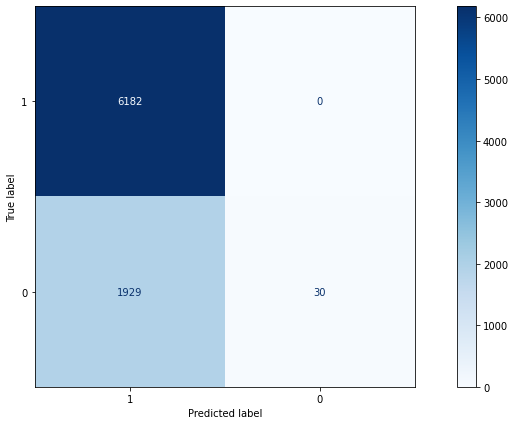

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

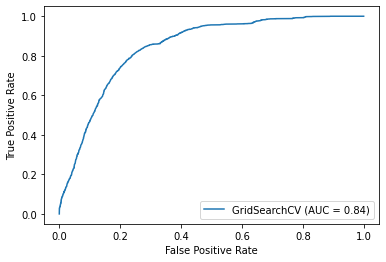

In [25]:
plot_roc_curve(gscv, X_test, y_test)

In [28]:
df, pa = preprocessing.preprocessing_significantes(utils.feature_engineering(utils.get_data()))

In [27]:
params = { 'alpha': np.linspace(0,1,1000) }
model = MultinomialNB()

In [29]:
gscv = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1, verbose=10)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df, pa, random_state=112)

In [31]:
scaler = MinMaxScaler() # Por default, en [0,1]

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [32]:
%%time
gscv.fit(X_train, y_train)
score = roc_auc_score(y_test, gscv.predict_proba(X_test)[:,1])

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1999s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1421s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:    6.2s
[Parallel(n_jo

CPU times: user 11 s, sys: 769 ms, total: 11.7 s
Wall time: 1min 2s


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.0min finished


In [33]:
gscv.best_params_

{'alpha': 0.9769769769769769}

In [34]:
score

0.8362583066086742

In [35]:
print(classification_report(y_test,gscv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6182
           1       0.00      0.00      0.00      1959

    accuracy                           0.76      8141
   macro avg       0.38      0.50      0.43      8141
weighted avg       0.58      0.76      0.66      8141



/home/nicolascontinanza/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


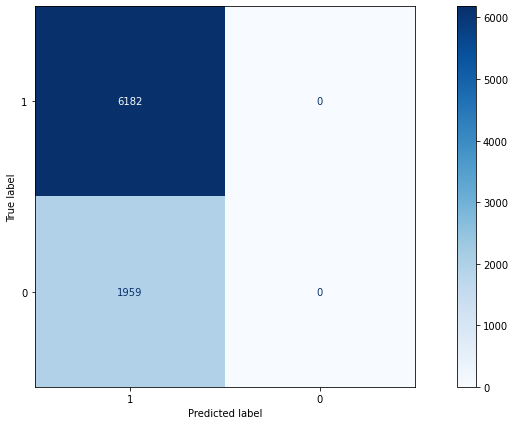

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(gscv, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()

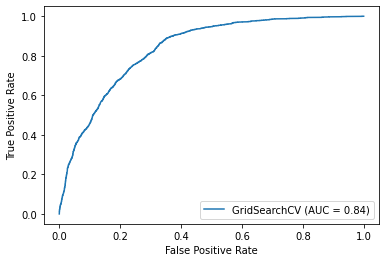

In [37]:
plot_roc_curve(gscv, X_test, y_test)